In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re

C1true = 1.0
C2true = 0.01

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
# load the training data

def load_training_data (num):
    data = loadmat("cylinder_nektar_wake.mat")
    #print(data)
    
    U_star = data["U_star"] #N X 2 X T
    P_star = data["p_star"] #N X T
    t_star = data["t"]  # T
    X_star = data["X_star"] # N X 2
    
    #print("X_star.shape",X_star.shape)
    #print("X_star",X_star)
    
    N = X_star.shape[0]
    T = t_star.shape[0]
    
    XX = np.tile(X_star[:,0:1], (1,T))
    YY = np.tile(X_star[:,1:2], (1,T))
    TT = np.tile(t_star, (1,N)).T
    UU = U_star[:, 0, :]
    VV = U_star[:, 1, :]
    PP = P_star
    
    #print("VVshape",VV.shape)
    #print("VV",VV)
    
    x = XX.flatten()[:,None]  # NT x 1
    y = YY.flatten()[:,None]
    t = TT.flatten()[:,None]
    u = UU.flatten()[:,None]
    v = VV.flatten()[:,None]
    p = PP.flatten()[:,None]
    
    #print("t.shape",t.shape)
    #print("t",t)
    
    data1 = np.concatenate([x, y, t, u, v, p], 1)
    
    #print("data1.shape",data1.shape)
    #print("data1",data1)
    
    # X xY = [1,8] x [-2, 2],  time = [0,7]
    
    data2 = data1[:,:][data1[:,2] <= 7]
    data3 = data2[:,:][data2[:,0] >= 1]
    data4 = data3[:,:][data3[:,0] <= 8]
    data5 = data4[:,:][data4[:,1] >= -2]
    data6 = data5[:,:][data5[:,1] <= 2]
    
    data_domian = data6
    
    #print("data_domian.shape",data_domian.shape)
    #print("data_domian",data_domian)
    
    idx = np.random.choice(data_domian.shape[0], num, replace= False)
    
    #print("idx",idx)
    
    x_train = data_domian[idx, 0:1]
    y_train = data_domian[idx, 1:2]
    t_train = data_domian[idx, 2:3]
    u_train = data_domian[idx, 3:4]
    v_train = data_domian[idx, 4:5]
    p_train = data_domian[idx, 5:6]
    
    return [x_train, y_train, t_train, u_train, v_train, p_train]

In [3]:
[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)

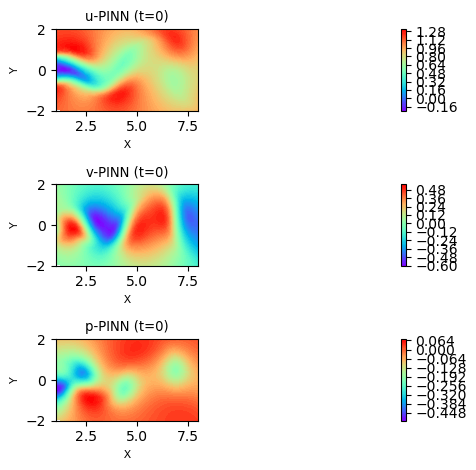

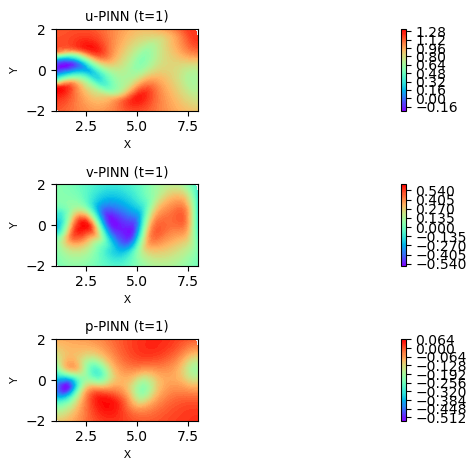

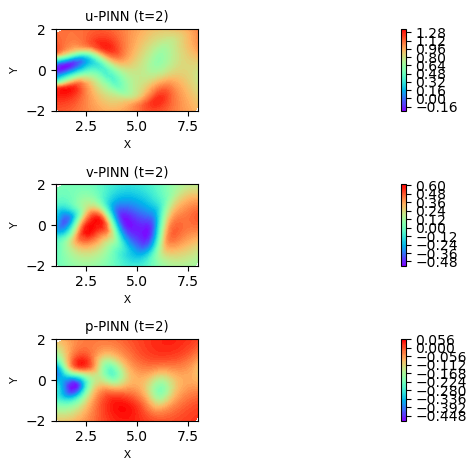

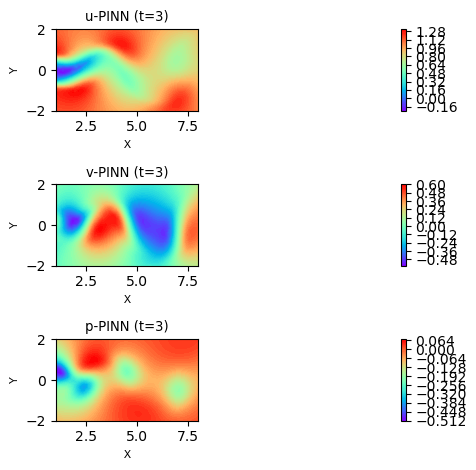

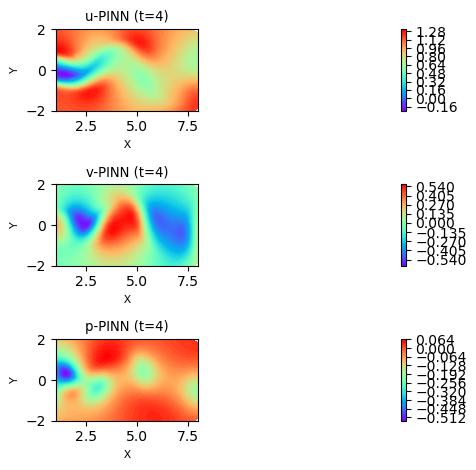

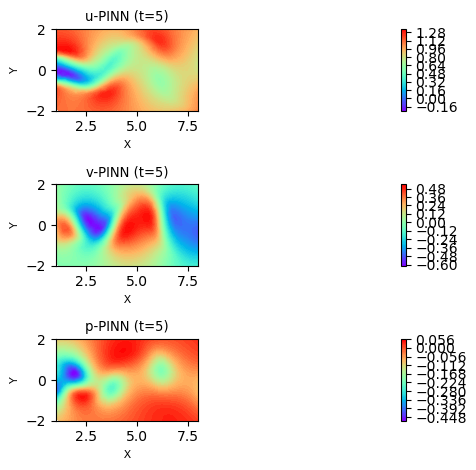

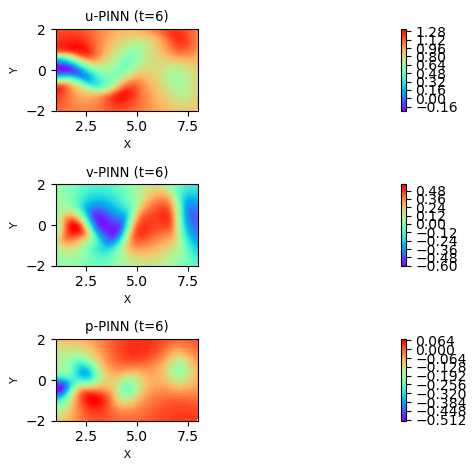

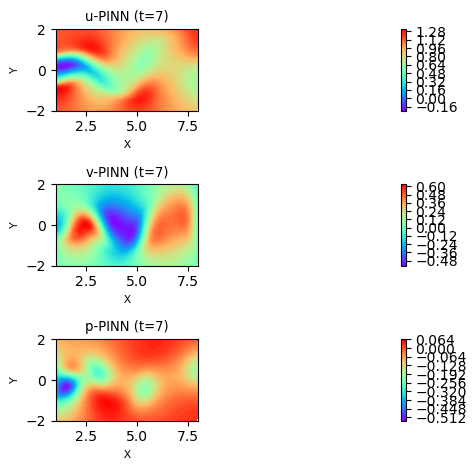

In [18]:
for t in range(0, 8):
    x_true = ob_x[ob_t == t]
    y_true = ob_y[ob_t == t]
    u_true = ob_u[ob_t == t]
    v_true = ob_v[ob_t == t]
    p_true = ob_p[ob_t == t] 
    fig, ax = plt.subplots(3, 1)
    # Velocity subplot
    cntr0 = ax[0].tricontourf(x_true, y_true, u_true, levels=80, cmap="rainbow")
    cb0 = plt.colorbar(cntr0, ax=ax[0])
    cntr1 = ax[1].tricontourf(x_true, y_true, v_true, levels=80, cmap="rainbow")
    cb1 = plt.colorbar(cntr1, ax=ax[1])
    # Pressure subplot
    cntr2 = ax[2].tricontourf(x_true, y_true, p_true, levels=80, cmap="rainbow")
    cb2 = plt.colorbar(cntr2, ax=ax[2])
    ax[0].set_title("u-PINN " + "(t=" + str(t) + ")", fontsize=9.5)
    ax[1].set_title("v-PINN " + "(t=" + str(t) + ")", fontsize=9.5)
    ax[2].set_title("p-PINN " + "(t=" + str(t) + ")", fontsize=9.5)  # Title for pressure subplot
    for i in range(3):
        ax[i].axis("scaled")
        ax[i].set_xlabel("X", fontsize=7.5, family="Arial")
        ax[i].set_ylabel("Y", fontsize=7.5, family="Arial")
    fig.tight_layout()
    plt.show()